## Problem 3 - Programming


In [4]:
#Install the required packages 
# Kindly uncomment the line to install the required packages

# !pip install -U liblinear-official
# !pip install sklearn
# !pip install -U libsvm-official


In [8]:
#• Download ‘covtype.binary’ (6.7M) from libsvm official site:
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/

from libsvm.svmutil import *
from scipy.sparse import csr_matrix

y, x = svm_read_problem('covtype.libsvm.binary', return_scipy=True)
print("Labels ", y)  # first column is binary labels
print("Sparse Matrix ",x)  # attributes as sparse matrix (category:value)

Labels  [1. 1. 2. ... 1. 1. 1.]
Tuples    (0, 0)	2596.0
  (0, 1)	51.0
  (0, 2)	3.0
  (0, 3)	258.0
  (0, 5)	510.0
  (0, 6)	221.0
  (0, 7)	232.0
  (0, 8)	148.0
  (0, 9)	6279.0
  (0, 10)	1.0
  (0, 42)	1.0
  (1, 0)	2590.0
  (1, 1)	56.0
  (1, 2)	2.0
  (1, 3)	212.0
  (1, 4)	-6.0
  (1, 5)	390.0
  (1, 6)	220.0
  (1, 7)	235.0
  (1, 8)	151.0
  (1, 9)	6225.0
  (1, 10)	1.0
  (1, 42)	1.0
  (2, 0)	2804.0
  (2, 1)	139.0
  :	:
  (581009, 15)	1.0
  (581010, 0)	2384.0
  (581010, 1)	170.0
  (581010, 2)	15.0
  (581010, 3)	60.0
  (581010, 4)	5.0
  (581010, 5)	90.0
  (581010, 6)	230.0
  (581010, 7)	245.0
  (581010, 8)	143.0
  (581010, 9)	864.0
  (581010, 12)	1.0
  (581010, 15)	1.0
  (581011, 0)	2383.0
  (581011, 1)	165.0
  (581011, 2)	13.0
  (581011, 3)	60.0
  (581011, 4)	4.0
  (581011, 5)	67.0
  (581011, 6)	231.0
  (581011, 7)	244.0
  (581011, 8)	141.0
  (581011, 9)	875.0
  (581011, 12)	1.0
  (581011, 15)	1.0


In [11]:
# Pre-proprocess the data by subtracting mean and scale them in [-1,1].

# Step 1 subtract mean from data point
x_mean_sub = csr_matrix(x-x.mean(axis=0))
print(x_mean_sub) #prints sparse matrix

  (0, 0)	-363.3653005424626
  (0, 1)	-104.65680743259855
  (0, 2)	-11.103703537969166
  (0, 3)	-11.42821662915793
  (0, 4)	-46.41885537648962
  (0, 5)	-1840.1466114303612
  (0, 6)	8.853951381548342
  (0, 7)	8.68128369135971
  (0, 8)	5.4717372446800425
  (0, 9)	4298.708773657003
  (0, 10)	0.5511349163176812
  (0, 11)	-0.05143439378184634
  (0, 12)	-0.4360736094958727
  (0, 13)	-0.06362691304132598
  (0, 14)	-0.005216759722691003
  (0, 15)	-0.01295153972723526
  (0, 16)	-0.008301033369362856
  (0, 17)	-0.021335187569276888
  (0, 18)	-0.0027486523514145315
  (0, 19)	-0.011316461622135784
  (0, 20)	-0.00018071915898466777
  (0, 21)	-0.0003080831376976716
  (0, 22)	-0.001974141670051622
  (0, 23)	-0.05616751461238791
  (0, 24)	-0.021359283457141512
  :	:
  (581011, 29)	-0.004896628641061
  (581011, 30)	-0.005889723448052998
  (581011, 31)	-0.0032684350753514175
  (581011, 32)	-0.006920683221689404
  (581011, 33)	-0.01593598755275367
  (581011, 34)	-0.0014423110021824239
  (581011, 35)	-0.05

In [14]:
# Normalize the Sparse matrix in range [-1,1]
normalizer = csr_find_scale_param(x_mean_sub, lower=-1, upper=1) # find scaling parameter for data in csr format.
normed_x = csr_scale(x_mean_sub, normalizer)

print(normed_x) # x after normalizing between range

  (0, 0)	-0.262631315657829
  (0, 1)	-0.7166666666666667
  (0, 2)	-0.909090909090909
  (0, 3)	-0.6306370794559771
  (0, 4)	-0.5529715762273902
  (0, 5)	-0.8566811858929324
  (0, 6)	0.7401574803149606
  (0, 7)	0.8267716535433071
  (0, 8)	0.16535433070866148
  (0, 9)	0.7507319113341698
  (0, 10)	1.0
  (0, 11)	-1.0
  (0, 12)	-1.0
  (0, 13)	-1.0
  (0, 14)	-1.0
  (0, 15)	-1.0
  (0, 16)	-1.0
  (0, 17)	-1.0
  (0, 18)	-1.0
  (0, 19)	-1.0
  (0, 20)	-1.0
  (0, 21)	-1.0
  (0, 22)	-1.0
  (0, 23)	-1.0
  (0, 24)	-1.0
  :	:
  (581011, 29)	-1.0
  (581011, 30)	-1.0
  (581011, 31)	-1.0
  (581011, 32)	-1.0
  (581011, 33)	-1.0
  (581011, 34)	-1.0
  (581011, 35)	-1.0
  (581011, 36)	-1.0
  (581011, 37)	-1.0
  (581011, 38)	-1.0
  (581011, 39)	-1.0
  (581011, 40)	-1.0
  (581011, 41)	-1.0
  (581011, 42)	-1.0
  (581011, 43)	-1.0
  (581011, 44)	-1.0
  (581011, 45)	-1.0
  (581011, 46)	-1.0
  (581011, 47)	-1.0
  (581011, 48)	-1.0
  (581011, 49)	-1.0
  (581011, 50)	-1.0
  (581011, 51)	-1.0
  (581011, 52)	-1.0
  (58

In [47]:
# Use Liblinear, apply SVM (primal), SVM (dual) (-s 0,1 and 2) and compare results and
# running time.

from datetime import datetime
stime =datetime.now() # start time 

from liblinear.liblinearutil import *
n = 10000 #number of samples to take for training
# train 10000 samples for solver type L2-regularized logistic regression (primal)
cs0=train(y[:n], normed_x[:n], '-C -s 0') 
m0=train(y[:n],normed_x[:n], '-s 0'.format(cs0))

time_elapsed = (datetime.now()-stime)
print("\n\n Time: ",time_elapsed)

log2c= -19.00	rate=85.38
log2c= -18.00	rate=85.38
log2c= -17.00	rate=85.38
log2c= -16.00	rate=85.38
log2c= -15.00	rate=85.38
log2c= -14.00	rate=85.38
log2c= -13.00	rate=85.38
log2c= -12.00	rate=85.38
log2c= -11.00	rate=85.38
log2c= -10.00	rate=85.38
log2c=  -9.00	rate=85.38
log2c=  -8.00	rate=85.74
log2c=  -7.00	rate=86.95
log2c=  -6.00	rate=87.13
log2c=  -5.00	rate=87.22
log2c=  -4.00	rate=87.27
log2c=  -3.00	rate=87.29
log2c=  -2.00	rate=87.31
log2c=  -1.00	rate=87.39
log2c=   0.00	rate=87.45
log2c=   1.00	rate=87.45
log2c=   2.00	rate=87.52
log2c=   3.00	rate=87.52
log2c=   4.00	rate=87.52
log2c=   5.00	rate=87.52
log2c=   6.00	rate=87.52
Best C = 4  CV accuracy = 87.52%
log2c=   7.00	rate=87.52

init f 6.931e+03 |g| 2.253e+04
iter  1 f 3.772e+03 |g| 4.035e+03 CG   2 step_size 1.00e+00 
iter  2 f 2.989e+03 |g| 2.000e+03 CG   4 step_size 1.00e+00 
iter  3 f 2.749e+03 |g| 6.461e+02 CG   5 step_size 1.00e+00 
iter  4 f 2.685e+03 |g| 2.151e+02 CG   7 step_size 1.00e+00 
iter  5 f 2.668e

In [42]:
# Predict labels 
pred_label0, pred_a0, pred_v0 = predict(y[:n],normed_x[:n], m0)


Accuracy = 87.7% (8770/10000) (classification)


In [48]:
# train 10000 samples for solver type L2-regularized L2-loss support vector classification (dual)
cs1=train(y[:n], normed_x[:n], '-s 1') 
m1=train(y[:n],normed_x[:n], '-s 1'.format(cs1))

time_elapsed = (datetime.now()-stime)
print("\n\n Time: ",time_elapsed)

..............................
optimization finished, #iter = 300
Objective value = -3427.594385
nSV = 5657

Switching to use -s 2

init f 3.445e+03 |g| 3.060e+03
iter  1 f 3.434e+03 |g| 1.003e+02 CG   2 step_size 1.00e+00 
..............................
optimization finished, #iter = 300
Objective value = -3427.550312
nSV = 5651

Switching to use -s 2

init f 3.436e+03 |g| 4.652e+02
iter  1 f 3.434e+03 |g| 1.654e+01 CG   4 step_size 1.00e+00 


 Time:  0:00:08.527720


In [45]:
# Predict labels 
pred_label1, pred_a1, pred_v1 = predict(y[:n],normed_x[:n], m1)

Accuracy = 87.56% (8756/10000) (classification)


In [49]:
# train 10000 samples for solver type L2-regularized L2-loss support vector classification (primal)
cs2=train(y[:n], normed_x[:n], '-C -s 2') 
m2=train(y[:n],normed_x[:n], '-s 2'.format(cs2))

time_elapsed = (datetime.now()-stime)
print("\n\n Time: ",time_elapsed)

log2c= -20.00	rate=85.38
log2c= -19.00	rate=85.38
log2c= -18.00	rate=85.38
log2c= -17.00	rate=85.38
log2c= -16.00	rate=85.38
log2c= -15.00	rate=85.38
log2c= -14.00	rate=85.38
log2c= -13.00	rate=85.38
log2c= -12.00	rate=85.38
log2c= -11.00	rate=86.06
log2c= -10.00	rate=86.93
log2c=  -9.00	rate=87.14
log2c=  -8.00	rate=87.07
log2c=  -7.00	rate=87.21
log2c=  -6.00	rate=87.44
log2c=  -5.00	rate=87.44
log2c=  -4.00	rate=87.44
log2c=  -3.00	rate=87.44
log2c=  -2.00	rate=87.44
log2c=  -1.00	rate=87.44
Best C = 0.015625  CV accuracy = 87.44%
log2c=   0.00	rate=87.44

init f 1.000e+04 |g| 9.012e+04
iter  1 f 4.309e+03 |g| 2.605e+03 CG   2 step_size 1.00e+00 
iter  2 f 3.584e+03 |g| 2.775e+03 CG   4 step_size 1.00e+00 
iter  3 f 3.476e+03 |g| 1.012e+03 CG   5 step_size 1.00e+00 
iter  4 f 3.446e+03 |g| 2.684e+02 CG   9 step_size 1.00e+00 
iter  5 f 3.438e+03 |g| 2.577e+02 CG   9 step_size 1.00e+00 
iter  6 f 3.436e+03 |g| 1.824e+02 CG   9 step_size 1.00e+00 
iter  7 f 3.436e+03 |g| 2.679e+01 CG 

In [51]:
# Predict labels 
pred_label2, pred_a2, pred_v2 = predict(y[:n],normed_x[:n], m2)

Accuracy = 87.55% (8755/10000) (classification)


In [55]:
# • Use Libsvm, apply kernel methods, see if the accuracy can beat linear SVMs.

sv_p = svm_problem(y[:n], normed_x[:n], isKernel=True)
sv_param = svm_parameter('-s 0')
mkernel0 = svm_train(sv_p, sv_param)


..
*
optimization finished, #iter = 2973
nu = 0.268378
obj = -2635.919411, rho = -0.808814
nSV = 2759, nBSV = 2618
Total nSV = 2759


In [58]:
pred_label_k_0, pred_a_k_0, pred_v_k_0 = svm_predict(y[:n],normed_x[:n], mkernel0)

#Below accuracy shows that use of kernel doesnt improve accuracy

Accuracy = 83.59% (8359/10000) (classification)


In [63]:
# • Apply PCA before classification, see whether the results can be improved.
from sklearn.decomposition import PCA

dense_normed_x=normed_x.todense()
c_pca =10
pca = PCA(n_components=c_pca)
pca.fit_transform(dense_normed_x)

print(pca.components_)

/Users/susheelgounder/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


[[ 1.16162549e-02 -6.17618461e-02 -3.14347287e-02 -2.21202815e-02
  -1.84916902e-02  1.24981231e-01  2.69898650e-02 -9.18069626e-04
  -2.64035302e-02  9.65927088e-02  6.46466005e-01 -1.25574794e-02
  -6.13183611e-01 -2.07249150e-02 -1.40210647e-03 -1.34657395e-02
  -6.62064806e-03 -2.69763602e-02 -7.92137298e-04 -2.95651379e-03
   2.23463699e-04  3.77199294e-04  2.01491699e-03 -4.68701557e-02
  -2.75209870e-02  6.47815767e-02 -4.15175309e-02 -7.28150890e-04
  -1.20423335e-06  3.40261824e-03 -6.24579861e-03  3.50964414e-03
   3.88924460e-03  8.41926831e-03 -1.92508944e-03  1.90539755e-02
   5.92793679e-03 -3.35132132e-02 -1.30361371e-04 -5.59274112e-03
  -2.41700821e-03 -2.27071513e-03  3.52317792e-01  6.34299351e-02
  -6.12991596e-02 -1.32055400e-01 -1.11469715e-01 -3.62217091e-03
  -4.43756473e-04 -2.62361824e-04  3.29797660e-04  8.49698952e-04
  -1.00668674e-03  2.57864343e-03]
 [-1.65096160e-01  1.25364179e-01  4.67235843e-02 -7.52278662e-02
  -6.87970768e-03 -2.02894151e-01 -5.2650

In [69]:
# Apply S 0 with PCA
spca0=train(y[:c_pca], pca.components_[:c_pca], '-C -s 0')
mpca0=train(y[:c_pca],pca.components_[:c_pca], '-s 0'.format(spca0))


log2c=  -4.00	rate=40
log2c=  -3.00	rate=40
log2c=  -2.00	rate=40
log2c=  -1.00	rate=40
log2c=   0.00	rate=40
log2c=   1.00	rate=40
log2c=   2.00	rate=40
log2c=   3.00	rate=40
Best C = 0.0625  CV accuracy = 40%

log2c=   4.00	rate=40
log2c=   5.00	rate=40
log2c=   6.00	rate=40
log2c=   7.00	rate=40
log2c=   8.00	rate=40
log2c=   9.00	rate=40
log2c=  10.00	rate=40
init f 6.931e+00 |g| 1.581e+00
iter  1 f 5.930e+00 |g| 4.151e-03 CG   2 step_size 1.00e+00 


In [70]:
p_labels_pca0, p_a_pca0, p_v_pca0 = predict(y[:c_pca],pca.components_[:c_pca], mpca0)

Accuracy = 100% (10/10) (classification)


In [71]:
# Apply S 1 with PCA
spca1=train(y[:c_pca], pca.components_[:c_pca], '-s 1')
mpca1=train(y[:c_pca],pca.components_[:c_pca], '-s 1'.format(spca1))



optimization finished, #iter = 2
Objective value = -3.333333
nSV = 10

optimization finished, #iter = 2
Objective value = -3.333333
nSV = 10


In [73]:
p_labels_pca1, p_a_pca1, p_v_pca1 = predict(y[:c_pca],pca.components_[:c_pca], mpca1)

Accuracy = 100% (10/10) (classification)


In [75]:
# Apply S 2 with PCA
spca2=train(y[:c_pca], pca.components_[:c_pca], '-s 2')
mpca2=train(y[:c_pca],pca.components_[:c_pca], '-s 2'.format(spca2))

init f 1.000e+01 |g| 6.325e+00
iter  1 f 3.333e+00 |g| 3.772e-03 CG   2 step_size 1.00e+00 
init f 1.000e+01 |g| 6.325e+00
iter  1 f 3.333e+00 |g| 3.772e-03 CG   2 step_size 1.00e+00 


In [77]:
p_labels_pca2, p_a_pca2, p_v_pca2 = predict(y[:c_pca],pca.components_[:c_pca], mpca2)

Accuracy = 100% (10/10) (classification)


   SVM -s 0
0       2.0
1       2.0
2       2.0
3       1.0
4       2.0
   Actual Labels
0            1.0
1            1.0
2            2.0
3            2.0
4            1.0


/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2566431279.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(labels_s0, 'ro', color='pink')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2566431279.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2566431279.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')


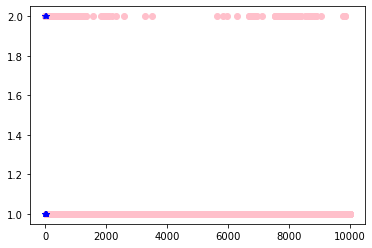

In [89]:
# • Visualize results in 2 dimensional space. (You may sample the data once it has too many
# points)

import pandas as pd
from matplotlib import pyplot as plt

#predicted labels by SVM -s 0
# before PCA

labels_s0 = pd.DataFrame(pred_label0)
labels_s0 = labels_s0.rename(columns = {0:'SVM -s 0'})
print(labels_s0.head())
#original labels in y
y_dataframe=pd.DataFrame(y[:10])
y_dataframe = y_dataframe.rename(columns = {0:'Actual Labels'})
print(y_dataframe.head())

plt.plot(labels_s0, 'ro', color='pink')
plt.plot(y_dataframe, 'ro', color='blue', marker='*')



   SVM PCA -s 0
0           1.0
1           1.0
2           2.0
3           2.0
4           1.0
   Actual Labels
0            1.0
1            1.0
2            2.0
3            2.0
4            1.0


/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2999468678.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(labels_s0, 'ro', color='pink')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2999468678.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2999468678.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')


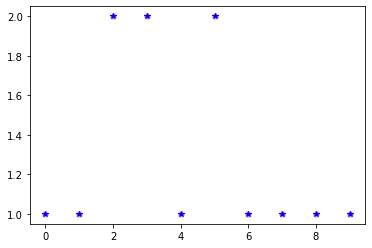

In [95]:
#predicted labels by SVM -s 0
# After PCA


labels_s0 = pd.DataFrame(p_labels_pca0)
labels_s0 = labels_s0.rename(columns = {0:'SVM PCA -s 0'})
print(labels_s0.head())
#original labels in y
y_dataframe=pd.DataFrame(y[:10])
y_dataframe = y_dataframe.rename(columns = {0:'Actual Labels'})
print(y_dataframe.head())

plt.plot(labels_s0, 'ro', color='pink')
plt.plot(y_dataframe, 'ro', color='blue', marker='*')

   SVM -s 0
0       2.0
1       2.0
2       2.0
3       1.0
4       1.0
   Actual Labels
0            1.0
1            1.0
2            2.0
3            2.0
4            1.0


/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/3459894995.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(labels_s0, 'ro', color='pink')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/3459894995.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/3459894995.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')


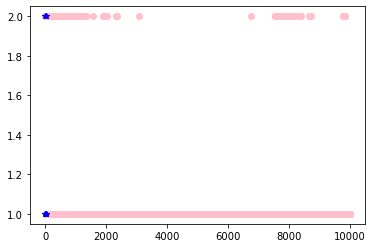

In [93]:
#predicted labels by SVM -s 1
# before PCA

labels_s0 = pd.DataFrame(pred_label1)
labels_s0 = labels_s0.rename(columns = {0:'SVM -s 1'})
print(labels_s0.head())
#original labels in y
y_dataframe=pd.DataFrame(y[:10])
y_dataframe = y_dataframe.rename(columns = {0:'Actual Labels'})
print(y_dataframe.head())

plt.plot(labels_s0, 'ro', color='pink')
plt.plot(y_dataframe, 'ro', color='blue', marker='*')

   SVM -s 1
0       1.0
1       1.0
2       2.0
3       2.0
4       1.0
   Actual Labels
0            1.0
1            1.0
2            2.0
3            2.0
4            1.0


/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2505251239.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(labels_s0, 'ro', color='pink')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2505251239.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2505251239.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')


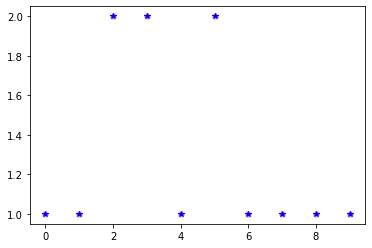

In [96]:
#predicted labels by SVM -s 1
# After PCA

labels_s0 = pd.DataFrame(p_labels_pca1)
labels_s0 = labels_s0.rename(columns = {0:'SVM -s 1'})
print(labels_s0.head())
#original labels in y
y_dataframe=pd.DataFrame(y[:10])
y_dataframe = y_dataframe.rename(columns = {0:'Actual Labels'})
print(y_dataframe.head())

plt.plot(labels_s0, 'ro', color='pink')
plt.plot(y_dataframe, 'ro', color='blue', marker='*')

   SVM -s 2
0       2.0
1       2.0
2       2.0
3       1.0
4       1.0
   Actual Labels
0            1.0
1            1.0
2            2.0
3            2.0
4            1.0


/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2337346898.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(labels_s0, 'ro', color='pink')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2337346898.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2337346898.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')


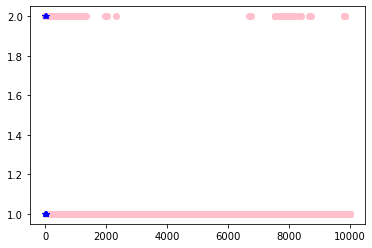

In [98]:
#predicted labels by SVM -s 2
# before PCA

labels_s0 = pd.DataFrame(pred_label2)
labels_s0 = labels_s0.rename(columns = {0:'SVM -s 2'})
print(labels_s0.head())
#original labels in y
y_dataframe=pd.DataFrame(y[:10])
y_dataframe = y_dataframe.rename(columns = {0:'Actual Labels'})
print(y_dataframe.head())

plt.plot(labels_s0, 'ro', color='pink')
plt.plot(y_dataframe, 'ro', color='blue', marker='*')

   SVM -s 2
0       1.0
1       1.0
2       2.0
3       2.0
4       1.0
   Actual Labels
0            1.0
1            1.0
2            2.0
3            2.0
4            1.0


/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2664332280.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(labels_s0, 'ro', color='pink')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2664332280.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')
/var/folders/m6/ybyk8c014sq3zcf9tnqqpf540000gn/T/ipykernel_17140/2664332280.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_dataframe, 'ro', color='blue', marker='*')


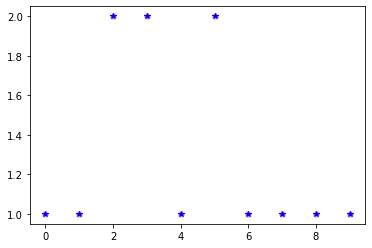

In [99]:
#predicted labels by SVM -s 2
# After PCA

labels_s0 = pd.DataFrame(p_labels_pca2)
labels_s0 = labels_s0.rename(columns = {0:'SVM -s 2'})
print(labels_s0.head())
#original labels in y
y_dataframe=pd.DataFrame(y[:10])
y_dataframe = y_dataframe.rename(columns = {0:'Actual Labels'})
print(y_dataframe.head())

plt.plot(labels_s0, 'ro', color='pink')
plt.plot(y_dataframe, 'ro', color='blue', marker='*')